         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000
Null Values:
 Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64
Aggregated Data:
          Duration     Calories
min     15.000000    50.300000
max    300.000000  1860.400000
count  169.000000   169.000000
mean    63.846154   375.790244


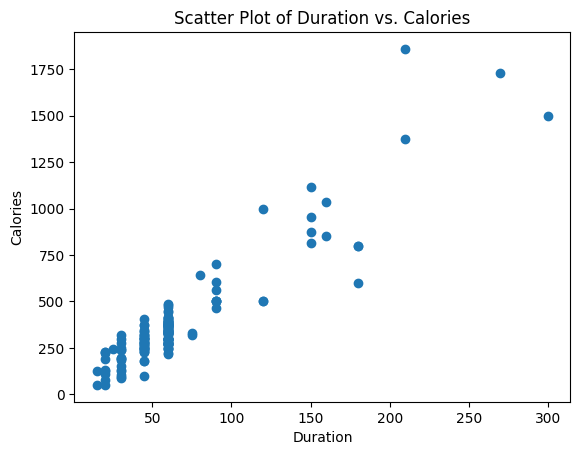

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv('/content/data.csv')

description = dataframe.describe()
print(description)

null_values = dataframe.isnull().sum()
print("Null Values:\n", null_values)

dataframe.fillna(dataframe.mean(), inplace=True)

agg_columns = ['Duration', 'Calories']
agg_functions = {
    'Duration': ['min', 'max', 'count', 'mean'],
    'Calories': ['min', 'max', 'count', 'mean']
}
aggregated_data = dataframe[agg_columns].agg(agg_functions)
print("Aggregated Data:\n", aggregated_data)

filtered_dataframe_calories = dataframe[(dataframe['Calories'] >= 500) & (dataframe['Calories'] <= 1000)]

filtered_dataframe_cal_pulse = dataframe[(dataframe['Calories'] > 500) & (dataframe['Pulse'] < 100)]


dataframe_modified = dataframe.drop(columns=['Maxpulse'])
dataframe.drop(columns=['Maxpulse'], inplace=True)

dataframe['Calories'] = dataframe['Calories'].astype(int)

plt.scatter(dataframe['Duration'], dataframe['Calories'])
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.title('Scatter Plot of Duration vs. Calories')
plt.show()


Mean Squared Error: 35301898.887134895


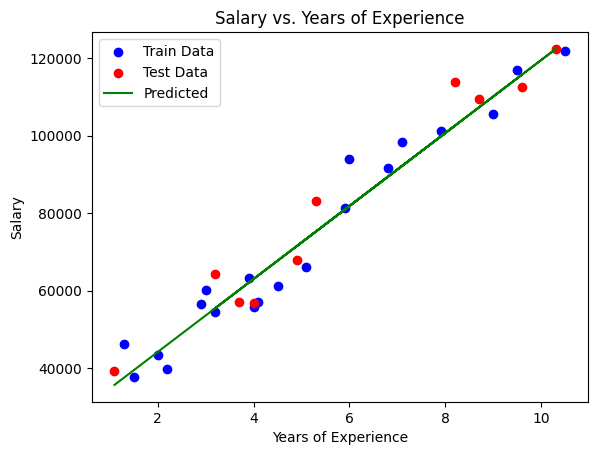

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Salary_Data.csv')

X = data[['YearsExperience']]
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.scatter(X_train, y_train, label='Train Data', color='blue')
plt.scatter(X_test, y_test, label='Test Data', color='red')
plt.plot(X_test, y_pred, label='Predicted', color='green')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.title('Salary vs. Years of Experience')
plt.show()